In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
import datetime as dt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [39]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM
from sklearn.utils import shuffle
import sys

In [5]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 10,
         'ytick.labelsize': 10}
plt.rcParams.update(params)

In [6]:
params = {}

In [7]:
## Change to the 'Datasets directory'
gold_col = 'GOLDAMGBDollarD228NLBM' # 'GOLD_shift' 
initial_dir = os.getcwd()
data_path = os.path.join(os.getcwd(), "data")

In [149]:
parameter_list = ['Industrial Production_Manufacturing (NAICS)', 'Federal Debt Held by Federal Reserve Banks', 'Unemployment_Rate', 'FEDFUNDS', 'Fed Debt_Total Public Debt as Perc of GDP']
none_list = ['All Employees, Retail Trade', 'IndustrialProductionGoldSilver21222S',]
parameter_list

['Industrial Production_Manufacturing (NAICS)',
 'Federal Debt Held by Federal Reserve Banks',
 'Unemployment_Rate',
 'FEDFUNDS',
 'Fed Debt_Total Public Debt as Perc of GDP']

In [150]:
## Import the train and test dataframes. Drop the 'dateRep' column as it is not need for the prediciton.
train_X = pd.read_csv(os.path.join(data_path, "train", 'train_x.csv'), index_col=0).sample(frac=1, random_state=1).filter(parameter_list, axis=1)
train_y = pd.read_csv(os.path.join(data_path, "train", 'train_y.csv'), index_col=0).sample(frac=1, random_state=1)
## '.sample' randomises the dataframe as the validation test below will take the bottom 20% of the data
## 'frac=1' means it will use all the data and 'random_state=1' keeps the resample consistent between df's
test_x = pd.read_csv(os.path.join(data_path, "test", 'test_x.csv'), index_col=0).sample(frac=1, random_state=1).filter(parameter_list, axis=1)
test_y = pd.read_csv(os.path.join(data_path, "test", 'test_y.csv'), index_col=0).sample(frac=1, random_state=1)

In [151]:
## Initialise Scalars so that data is normalised to 1.
sc_x = StandardScaler()
sc_y = StandardScaler()
## Normalise the data using the scalar.
X_train = sc_x.fit_transform(train_X)
X_test = sc_x.transform(test_x)

y_train = sc_y.fit_transform(train_y)
y_test = sc_y.transform(test_y)

In [152]:
## Calculate the number of input 'test' columns.
input_neuron = len(test_x.columns)

In [154]:
## Setup the model for training, parameters here can and should be adjusted to create the best model.
classifier = Sequential()
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = input_neuron))
classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'NAdam', loss = 'mean_squared_error', metrics = ["mae"])
## '.fit' starts the training. 30 seconds to 2 minutes to run.
classifier.fit(X_train, y_train, batch_size = 32, nb_epoch = 500, validation_split= 0.1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=80, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Upd

Train on 513 samples, validate on 57 samples
Epoch 1/500
513/513 [==============================] - 1s 2ms/step - loss: 0.9838 - mae: 0.7236 - val_loss: 1.0935 - val_mae: 0.7724
Epoch 2/500
513/513 [==============================] - 0s 80us/step - loss: 0.8556 - mae: 0.6221 - val_loss: 0.8402 - val_mae: 0.5978
Epoch 3/500
513/513 [==============================] - 0s 73us/step - loss: 0.4540 - mae: 0.4261 - val_loss: 0.1661 - val_mae: 0.2963
Epoch 4/500
513/513 [==============================] - 0s 72us/step - loss: 0.1146 - mae: 0.2505 - val_loss: 0.1089 - val_mae: 0.2477
Epoch 5/500
513/513 [==============================] - 0s 76us/step - loss: 0.0940 - mae: 0.2207 - val_loss: 0.0946 - val_mae: 0.2121
Epoch 6/500
513/513 [==============================] - 0s 72us/step - loss: 0.0772 - mae: 0.1931 - val_loss: 0.1344 - val_mae: 0.2230
Epoch 7/500
513/513 [==============================] - 0s 75us/step - loss: 0.0768 - mae: 0.1836 - val_loss: 0.0741 - val_mae: 0.1675
Epoch 8/500
513/51

In [155]:
model_path = os.path.join(os.getcwd(), "model")
# Check if the relevant folders exist and create them if not
if os.path.exists(model_path) is False:
    os.mkdir(model_path)
# Export the model for future use to that you don't need to spend time training the model again
pickle.dump(classifier, open(os.path.join(model_path, "ReinNN_.pkl"), "wb"))

In [156]:
"""model_path = os.path.join(data_folder, "model")
# Import the exported model in future runs using the greyed out line below (remove the hastag)
model = pickle.load(open(os.path.join(model_path, "ReinNN.pkl"), "rb"))"""

'model_path = os.path.join(data_folder, "model")\n# Import the exported model in future runs using the greyed out line below (remove the hastag)\nmodel = pickle.load(open(os.path.join(model_path, "ReinNN.pkl"), "rb"))'

In [157]:
## Import the train and test dataframes. Drop the 'dateRep' column as it is not need for the prediciton.
train_X = pd.read_csv(os.path.join(data_path, "train", 'train_x.csv'), index_col=0).sample(frac=1, random_state=1).filter(parameter_list, axis=1)
train_y = pd.read_csv(os.path.join(data_path, "train", 'train_y.csv'), index_col=0).sample(frac=1, random_state=1)
## '.sample' randomises the dataframe as the validation test below will take the bottom 20% of the data
## 'frac=1' means it will use all the data and 'random_state=1' keeps the resample consistent between df's
test_x = pd.read_csv(os.path.join(data_path, "test", 'test_x.csv'), index_col=0).sample(frac=1, random_state=1).filter(parameter_list, axis=1)
test_y = pd.read_csv(os.path.join(data_path, "test", 'test_y.csv'), index_col=0).sample(frac=1, random_state=1)

## Initialise Scalars so that data is normalised to 1.
sc_x = StandardScaler()
sc_y = StandardScaler()
## Normalise the data using the scalar.
X_train = sc_x.fit_transform(train_X)
X_test = sc_x.transform(test_x)

y_train = sc_y.fit_transform(train_y)
y_test = sc_y.transform(test_y)

# Calculate the predicted deaths according to the neural net model
test_x["gold_pred"] = sc_y.inverse_transform(classifier.predict(X_test))
# Calculate the predicted deaths according to the neural net model
train_X["gold_pred"] = sc_y.inverse_transform(classifier.predict(X_train))
#df1 = pd.concat([test_x, train_X], axis=1)
df= train_X.merge(train_y,left_index=True, right_index=True)
# We merge the test dataframes together
df1 = test_x.merge(test_y, left_index=True, right_index=True)
# We append the test data to the train data
df = df.append(df1)

# Again read in the 'covid19_df' as df_global
df_global = pd.read_csv(os.path.join(os.getcwd(), "Data_Export", "gold_df.csv"), index_col=0)
# Merge in the 'deaths_pred' prediction column to compare to the real data
df_global = df_global.merge(df["gold_pred"], left_index=True, right_index=True, how='left')
df_global.index = pd.to_datetime(df_global.index)




In [158]:
# Compute the prediction error
df_global['gold_pred_error'] = df_global['GOLDAMGBDollarD228NLBM'] - df_global['gold_pred']
# Compute the cumulative error for gold
df_global['cumulative_error'] = df_global['gold_pred_error'].cumsum()

Text(0, 0.5, 'Price (US $)')

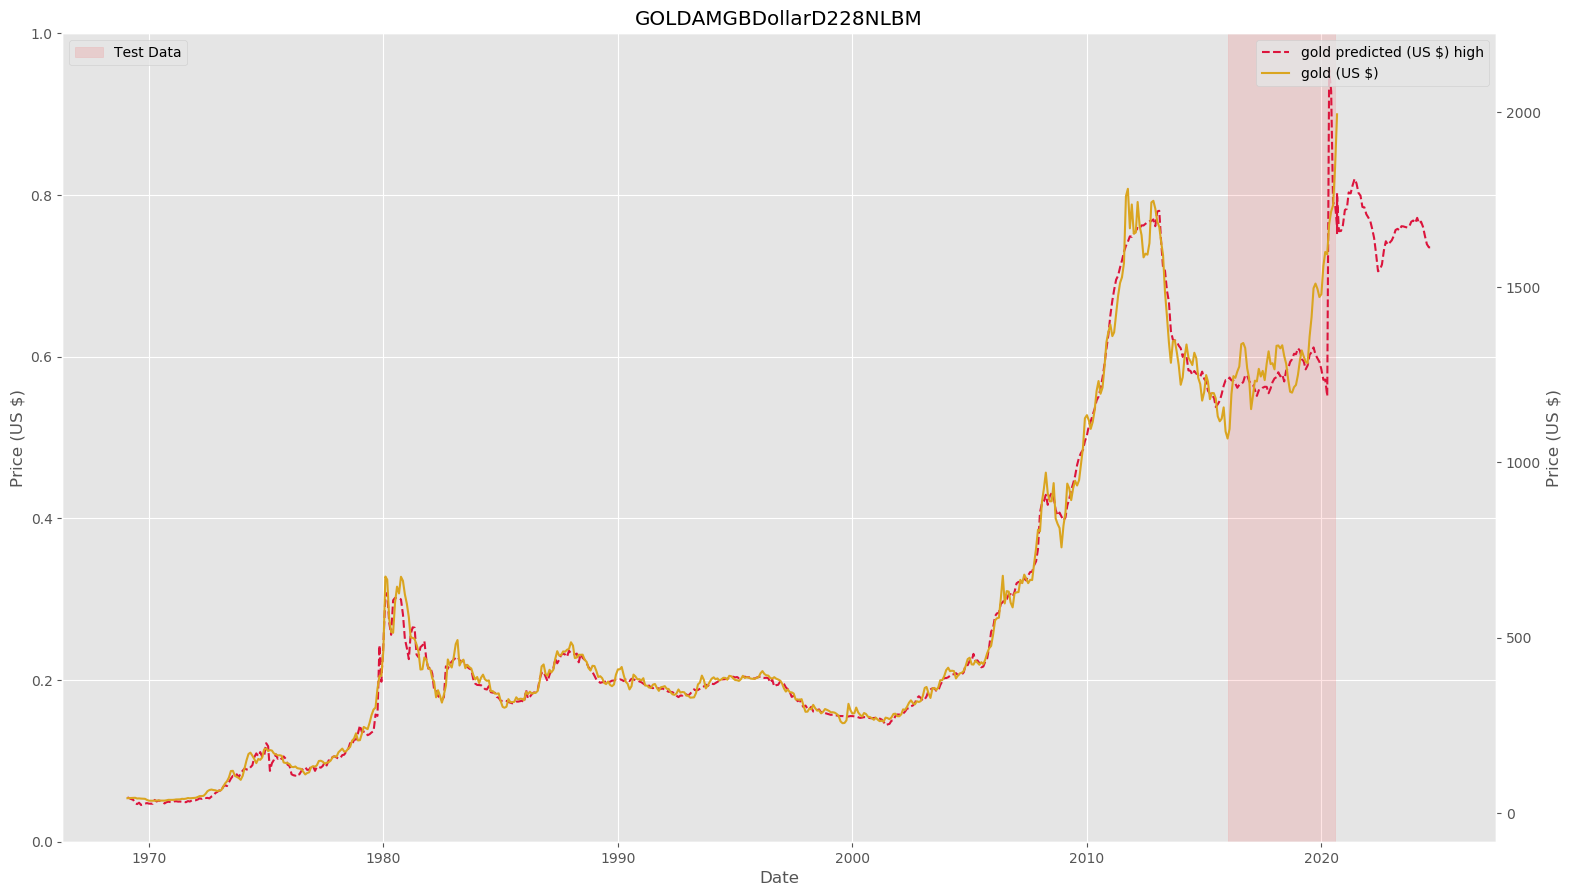

In [159]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'GOLDAMGBDollarD228NLBM'
k = 'gold_pred_error'
l = 'gold_pred'

#ax1.plot(df_global.index, df_global[k], label=k, c='mediumturquoise')
#ax1.axvline(x=dt.date(2020, 8, 1), linestyle='--', color='black', label='Real_Data_Cutoff', linewidth=1)
#ax1.axvline(x=dt.date(2016, 1, 1), linestyle=':', color='black', label='Test_Data_Cutoff', linewidth=1)

ax2 = ax1.twinx()
ax1.axvspan(dt.date(2016, 1, 1), dt.date(2020, 8, 1), alpha=0.1, color='red', label='Test Data')
ax2.plot(df_global.index, df_global[l], label='gold predicted (US $) high', c='crimson', linestyle='dashed')
ax2.plot(df_global.index, df_global[j], label='gold (US $)', c='goldenrod')


#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (US $)')
ax2.set_ylabel('Price (US $)')
#plt.savefig('cumulative_error_20_countries_XGB_dpi300.jpeg', dpi=300)

In [160]:
## Calculate the mean absolute error and R2 scores for the predicted vs real test data.
print(f"Test data MAE score: {np.round(mean_absolute_error(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")
print(f"Test data R2 score: {np.round(r2_score(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")

Test data MAE score: 104.0
Test data R2 score: 0.0


Text(0, 0.5, 'Price (US $)')

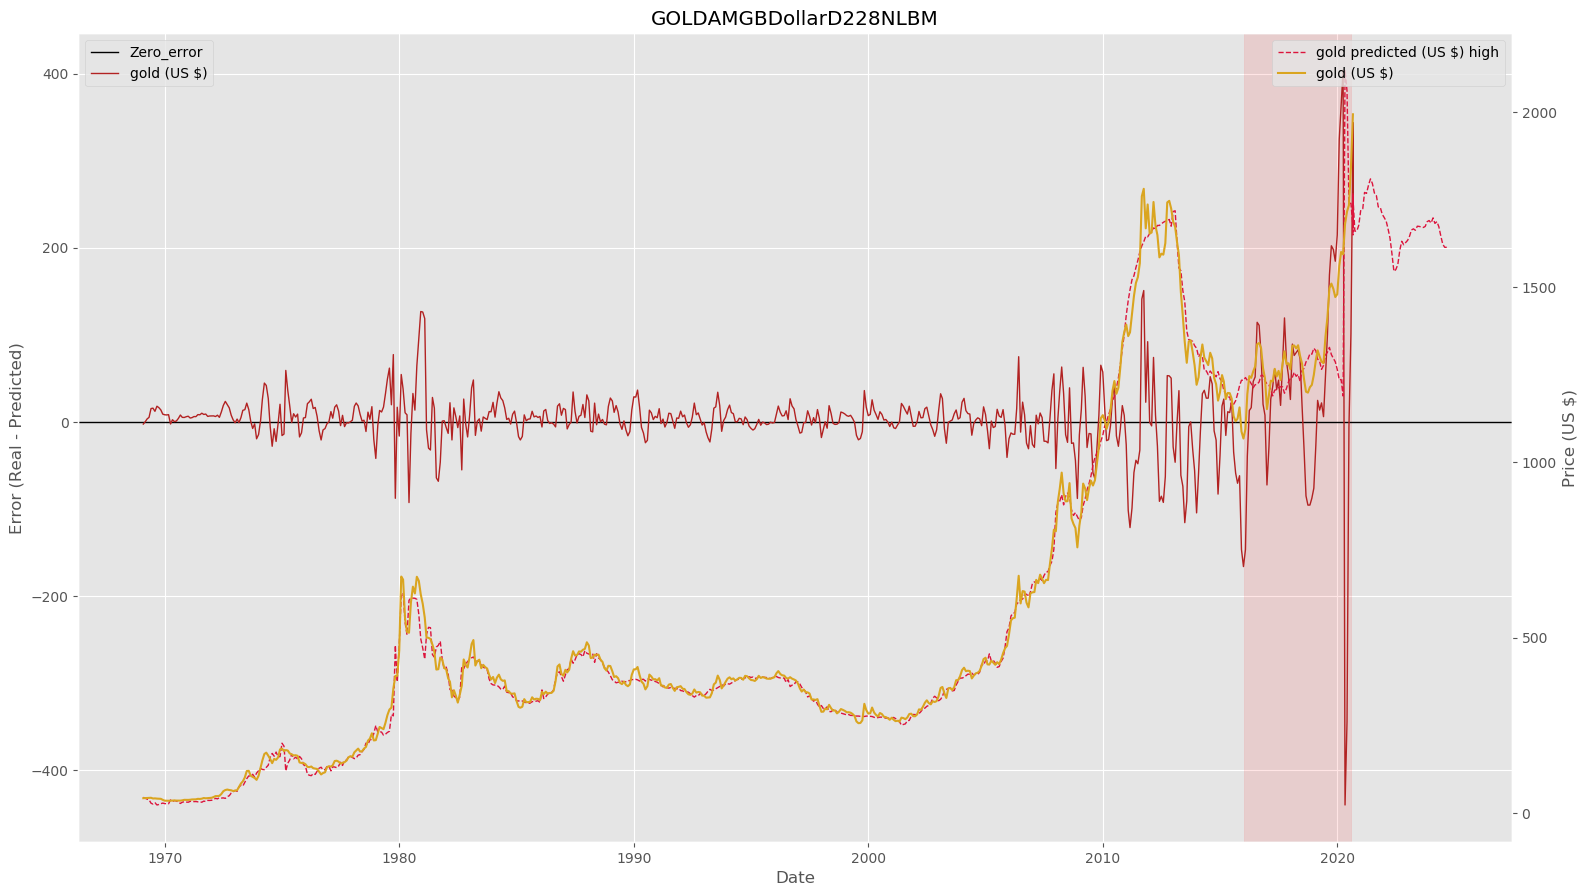

In [161]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'GOLDAMGBDollarD228NLBM'
k = 'gold_pred_error'
l = 'gold_pred'

#ax1.plot(df_global.index, df_global[k], label=k, c='mediumturquoise')
#ax1.axvline(x=dt.date(2020, 8, 1), linestyle='--', color='black', label='Real_Data_Cutoff', linewidth=1)
#ax1.axvline(x=dt.date(2016, 1, 1), linestyle=':', color='black', label='Test_Data_Cutoff', linewidth=1)
ax1.axhline(y=0, color='black', label='Zero_error', linewidth=1)

ax2 = ax1.twinx()
ax1.axvspan(dt.date(2016, 1, 1), dt.date(2020, 8, 1), alpha=0.1, color='red')
ax2.plot(df_global.index, df_global[l], label='gold predicted (US $) high', c='crimson', linestyle='dashed', linewidth=1)
ax1.plot(df_global.index, df_global[k], label='gold (US $)', c='firebrick', linewidth=1)
ax2.plot(df_global.index, df_global[j], label='gold (US $)', c='goldenrod')


#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Error (Real - Predicted)')
ax2.set_ylabel('Price (US $)')
#plt.savefig('cumulative_error_20_countries_XGB_dpi300.jpeg', dpi=300)

In [162]:
## Check for the directory and output the df_global dataframe.
if os.path.exists(os.path.join(os.getcwd(), "model_predictions")) is False:
    os.mkdir(os.path.join(os.getcwd(), "model_predictions"))
df_global.to_csv(os.path.join(os.getcwd(), "model_predictions", "Rein_nn_predictions.csv"))

In [163]:
plt.style.use("ggplot")

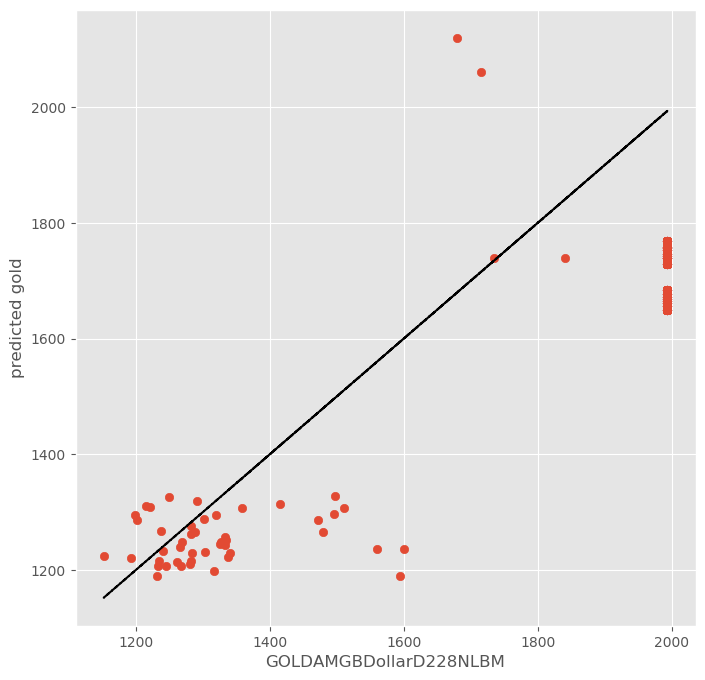

In [164]:
## Plot deaths vs predicted.
plt.figure(figsize=(8, 8))
plt.scatter(df1.GOLDAMGBDollarD228NLBM, df1.gold_pred)
plt.plot(df1.GOLDAMGBDollarD228NLBM, df1.GOLDAMGBDollarD228NLBM, color="black", linestyle="--")
plt.xlabel("GOLDAMGBDollarD228NLBM")
plt.ylabel("predicted gold")
plt.show()

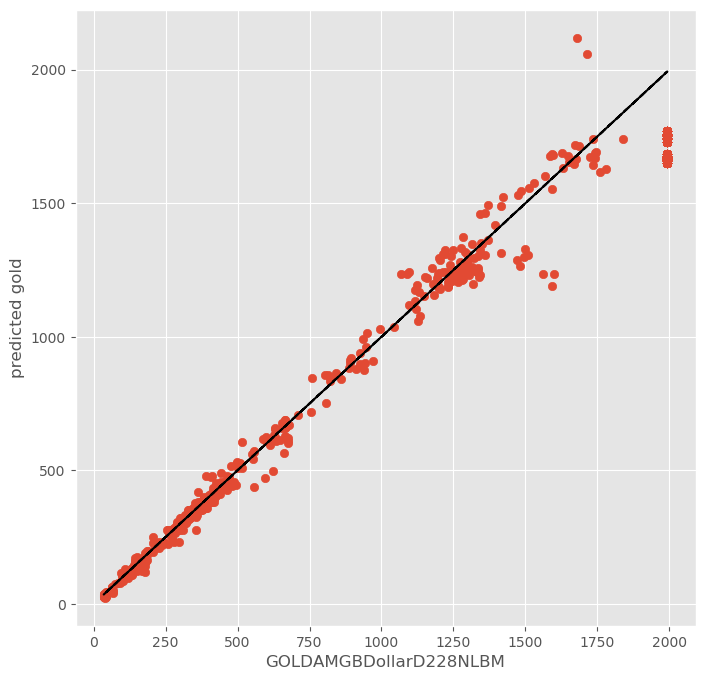

In [165]:
## Plot deaths vs predicted.
plt.figure(figsize=(8, 8))
plt.scatter(df_global.GOLDAMGBDollarD228NLBM, df_global.gold_pred)
plt.plot(df_global.GOLDAMGBDollarD228NLBM, df_global.GOLDAMGBDollarD228NLBM, color="black", linestyle="--")
plt.xlabel("GOLDAMGBDollarD228NLBM")
plt.ylabel("predicted gold")
plt.show()

In [33]:
plt.rcdefaults()